In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# Importing dataframes
train= pd.read_csv('train.csv',delimiter=';') #train dataset
test= pd.read_csv('test.csv',delimiter=';') #Test dataset

In [56]:
# Show Dataset
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [57]:
# Checking for null's

print(train.isnull().sum(axis = 0))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# EDA

Create Categories Column

In [58]:
#Creating

train['age_cat'] = pd.cut(train['age'],bins=8)

In [59]:
train['day_cat']=train['day'].astype(str)


test['day_cat']=test['day'].astype(str)

In [60]:
train['duration_min']= train['duration']/60

conditions =  [(train['duration_min']<1),
              ((train['duration_min']>=1) & (train['duration_min']<2)),
              ((train['duration_min']>=2) & (train['duration_min']<3)),
              ((train['duration_min']>=3) & (train['duration_min']<4)),
              ((train['duration_min']>=4) & (train['duration_min']<5)),
              ((train['duration_min']>=5) & (train['duration_min']<6)),
              ((train['duration_min']>=6) & (train['duration_min']<7)),
              ((train['duration_min']>=7) & (train['duration_min']<8)),
              ((train['duration_min']>=8) & (train['duration_min']<9)),
              ((train['duration_min']>=9))]

values = ['<1','1/2','2/3','3/4','4/5','5/6','6/7','7/8','8/9','>9']

train['duration_cat'] = np.select(conditions, values)

train.drop(columns='duration_min', inplace=True)

In [61]:
conditions = [(train['balance'] < -2500), 
              ((train['balance']>=-2500) & (train['balance']<0)), 
              ((train['balance']>=0) & (train['balance']<100)),
              ((train['balance']>=100) & (train['balance']<200)),
              ((train['balance']>=200) & (train['balance']<300)),
              ((train['balance']>=300) & (train['balance']<400)),
              ((train['balance']>=400) & (train['balance']<500)),
              ((train['balance']>=500) & (train['balance']<600)),
              ((train['balance']>=600) & (train['balance']<700)),
              ((train['balance']>=700) & (train['balance']<800)),
              ((train['balance']>=800) & (train['balance']<900)),
              ((train['balance']>=900) & (train['balance']<1000)),              
              ((train['balance']>=1000) & (train['balance']<1500)),
              ((train['balance']>=1500) & (train['balance']<2000)),
              ((train['balance']>=2000) & (train['balance']<3000)),
              ((train['balance']>=3000) & (train['balance']<4000)),
              ((train['balance']>=4000) & (train['balance']<5000)),
              ((train['balance']>=5000) & (train['balance']<10000)),
              ((train['balance']>=10000))]           
             

values = ['<-2.5k','-2.5k/0','0/100','100/200','200/300','300/400','400/500','500/600','600/700','700/800','800/900','900/1k','1k/1.5k','1.5k/2k','2k/3k','3k/4k','4k/5k','5k/10k','>10k']

train['balance_cat'] = np.select(conditions, values)

In [62]:
conditions = [(train['campaign'] ==1), 
              (train['campaign']==2),
               (train['campaign']==3), 
              (train['campaign']==4),
               (train['campaign']==5),
              (train['campaign']==6),
               (train['campaign']==7),
              (train['campaign']==8),
               (train['campaign']==9),
              (train['campaign']==10),
              ((train['campaign']>10)&(train['campaign']<15)),
              ((train['campaign']>=15)&(train['campaign']<20)),
              ((train['campaign']>=20)&(train['campaign']<25)),
              ((train['campaign']>=25)&(train['campaign']<30)),
              ((train['campaign']>=30)&(train['campaign']<35)),
              ((train['campaign']>=35)&(train['campaign']<40)),              
              (train['campaign']>=40)]           
             

values = ['1','2','3','4','5','6','7','8','9','10','10/15','15/20','20/25','25/30','30/35','35/40','>40']
train['campaign_cat'] = np.select(conditions, values)

In [63]:
conditions = [(train['pdays'] ==-1), 
              ((train['pdays']>0)&(train['pdays']<50)),
              ((train['pdays']>=50)&(train['pdays']<100)),
              ((train['pdays']>=100)&(train['pdays']<150)),
              ((train['pdays']>=150)&(train['pdays']<200)),
              ((train['pdays']>=200)&(train['pdays']<250)),
              ((train['pdays']>=250)&(train['pdays']<300)),              
              ((train['pdays']>=300)&(train['pdays']<350)), 
              ((train['pdays']>=350)&(train['pdays']<400)),
              ((train['pdays']>=400)&(train['pdays']<450)),
              ((train['pdays']>=450)&(train['pdays']<500)),
              ((train['pdays']>=500)&(train['pdays']<550)),
              (train['pdays']>=550)]
             

values = ['nc','0/50','50/100','100/150','150/200','200/250','250/300','300/350','350/400','400/450','450/500','500/550','>550']

train['pdays_cat'] = np.select(conditions, values)


conditions = [(test['pdays'] ==-1), 
              ((test['pdays']>0)&(test['pdays']<50)),
              ((test['pdays']>=50)&(test['pdays']<100)),
              ((test['pdays']>=100)&(test['pdays']<150)),
              ((test['pdays']>=150)&(test['pdays']<200)),
              ((test['pdays']>=200)&(test['pdays']<250)),
              ((test['pdays']>=250)&(test['pdays']<300)),              
              ((test['pdays']>=300)&(test['pdays']<350)), 
              ((test['pdays']>=350)&(test['pdays']<400)),
              ((test['pdays']>=400)&(test['pdays']<450)),
              ((test['pdays']>=450)&(test['pdays']<500)),
              ((test['pdays']>=500)&(test['pdays']<550)),
              ((test['pdays']>550))]
             

values = ['nc','0/50','50/100','100/150','150/200','200/250','250/300','300/350','350/400','400/450','450/500','500/550', '>550']

test['pdays_cat'] = np.select(conditions, values)

In [64]:
conditions = [(train['previous'] ==1), 
              (train['previous']==2),
               (train['previous']==3), 
              (train['previous']==4),
               (train['previous']==5),
              (train['previous']==6),
               (train['previous']==7),
              (train['previous']==8),
               (train['previous']==9),
              (train['previous']==10),
              ((train['previous']>10)&(train['previous']<15)),
              ((train['previous']>=15)&(train['previous']<20)),
              ((train['previous']>=20)&(train['previous']<25)),
              ((train['previous']>=25)&(train['previous']<30)),
              ((train['previous']>=30)&(train['previous']<35)),
              ((train['previous']>=35)&(train['previous']<40)),              
              (train['previous']>=40)]           
             

values = ['1','2','3','4','5','6','7','8','9','10','10/15','15/20','20/25','25/30','30/35','35/40','>40']

train['previous_cat'] = np.select(conditions, values)

In [65]:
def cat(df,c):
    ### This function prints the value_counts (%) and the categorical count graphs for a given categorical column C in a dataframe (df).
    for i in c:
        print('Information about', i)
        print(round((df[i].value_counts(normalize=True) * 100),2))
        sns.catplot(x = i, kind ='count', data = df, aspect = 8, height = 2, order=df[i].value_counts().index)
        plt.show()    

Information about age_cat
(27.625, 37.25]     38.40
(37.25, 46.875]     25.50
(46.875, 56.5]      20.24
(56.5, 66.125]       7.60
(17.923, 27.625]     6.75
(66.125, 75.75]      0.94
(75.75, 85.375]      0.52
(85.375, 95.0]       0.06
Name: age_cat, dtype: float64


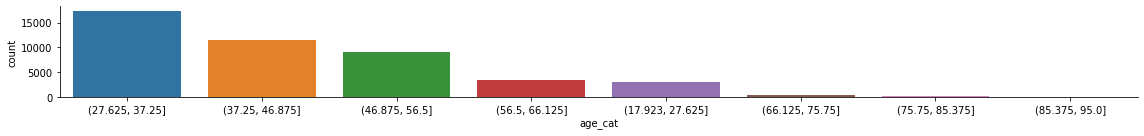

Information about job
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64


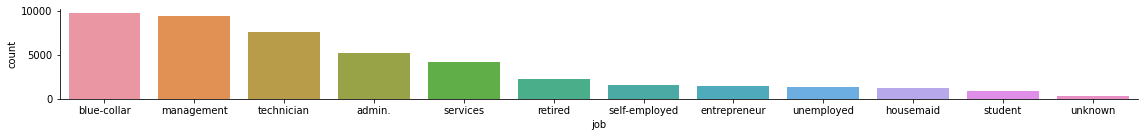

Information about marital
married     60.19
single      28.29
divorced    11.52
Name: marital, dtype: float64


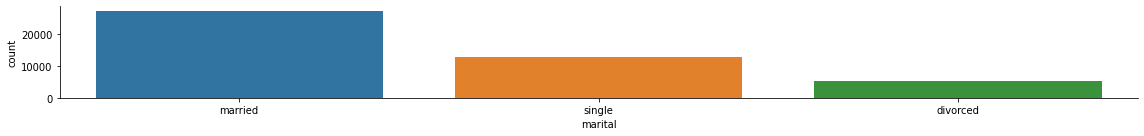

Information about education
secondary    51.32
tertiary     29.42
primary      15.15
unknown       4.11
Name: education, dtype: float64


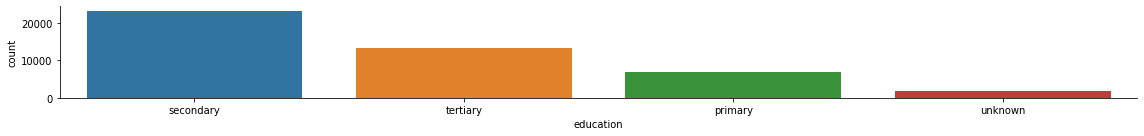

Information about default
no     98.2
yes     1.8
Name: default, dtype: float64


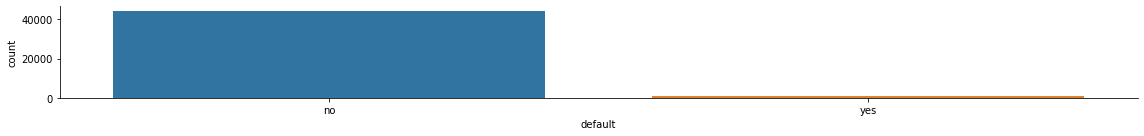

Information about balance_cat
0/100      19.18
-2.5k/0     8.31
1k/1.5k     8.27
100/200     7.63
200/300     6.69
2k/3k       6.39
300/400     5.84
1.5k/2k     5.30
400/500     4.62
5k/10k      4.46
500/600     4.16
3k/4k       3.80
600/700     3.51
700/800     2.89
800/900     2.49
4k/5k       2.33
900/1k      2.28
>10k        1.83
<-2.5k      0.02
Name: balance_cat, dtype: float64


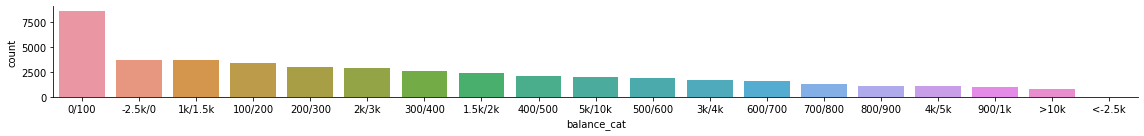

Information about housing
yes    55.58
no     44.42
Name: housing, dtype: float64


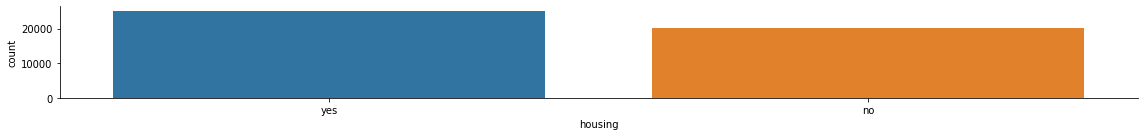

Information about loan
no     83.98
yes    16.02
Name: loan, dtype: float64


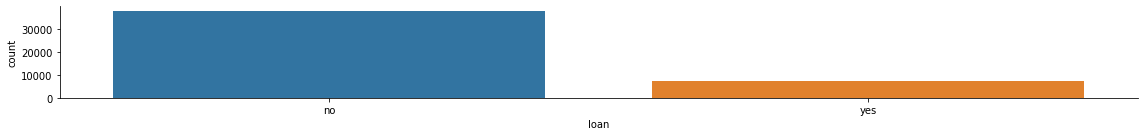

Information about contact
cellular     64.77
unknown      28.80
telephone     6.43
Name: contact, dtype: float64


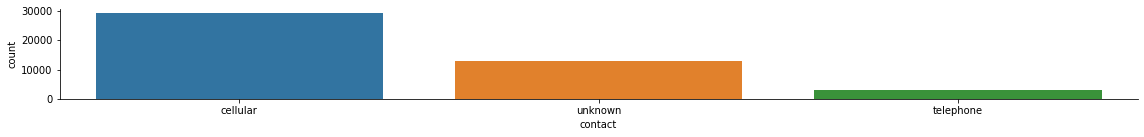

Information about day_cat
20    6.09
18    5.10
21    4.48
17    4.29
6     4.27
5     4.22
14    4.09
8     4.07
28    4.05
7     4.02
19    3.89
29    3.86
15    3.77
12    3.55
13    3.51
30    3.46
9     3.45
11    3.27
4     3.20
16    3.13
2     2.86
27    2.48
3     2.39
26    2.29
23    2.08
22    2.00
25    1.86
31    1.42
10    1.16
24    0.99
1     0.71
Name: day_cat, dtype: float64


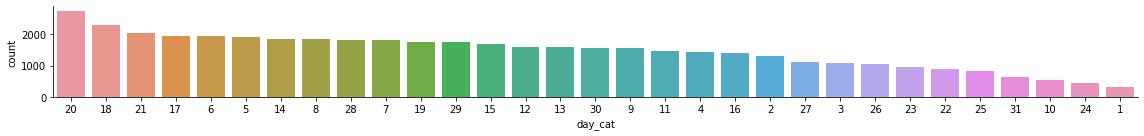

Information about month
may    30.45
jul    15.25
aug    13.82
jun    11.81
nov     8.78
apr     6.49
feb     5.86
jan     3.10
oct     1.63
sep     1.28
mar     1.06
dec     0.47
Name: month, dtype: float64


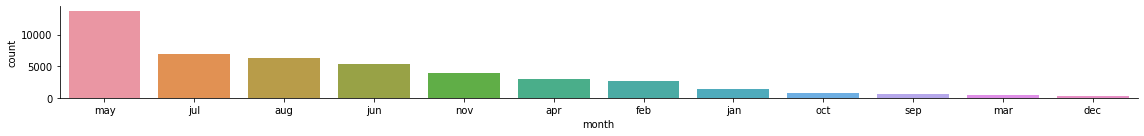

Information about duration_cat
1/2    20.46
2/3    19.09
3/4    13.41
<1     10.31
>9     10.30
4/5     9.47
5/6     6.47
6/7     4.71
7/8     3.32
8/9     2.48
Name: duration_cat, dtype: float64


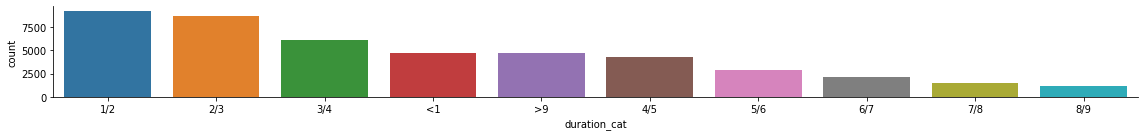

Information about campaign_cat
1        38.80
2        27.66
3        12.21
4         7.79
5         3.90
6         2.86
7         1.63
10/15     1.29
8         1.19
15/20     0.72
9         0.72
10        0.59
20/25     0.32
25/30     0.17
30/35     0.09
35/40     0.03
>40       0.03
Name: campaign_cat, dtype: float64


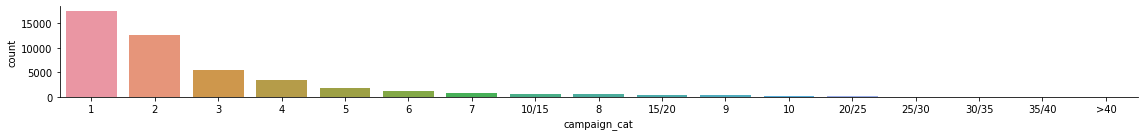

Information about pdays_cat
nc         81.74
150/200     4.39
300/350     2.57
50/100      2.56
350/400     2.43
250/300     2.16
100/150     1.98
200/250     1.10
0/50        0.55
>550        0.16
450/500     0.15
400/450     0.13
500/550     0.07
Name: pdays_cat, dtype: float64


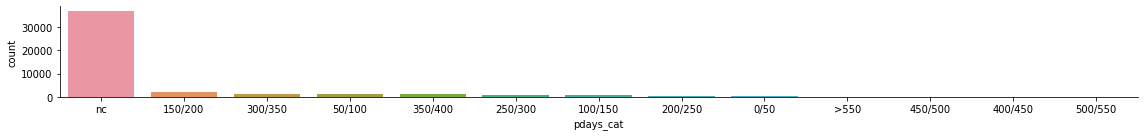

Information about previous_cat
0        81.74
1         6.13
2         4.66
3         2.53
4         1.58
5         1.02
6         0.61
7         0.45
10/15     0.37
8         0.29
9         0.20
10        0.15
15/20     0.14
20/25     0.07
25/30     0.04
>40       0.01
35/40     0.01
30/35     0.01
Name: previous_cat, dtype: float64


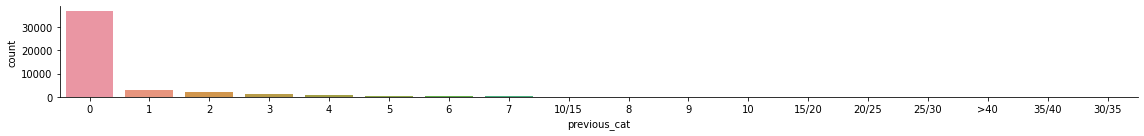

Information about poutcome
unknown    81.75
failure    10.84
other       4.07
success     3.34
Name: poutcome, dtype: float64


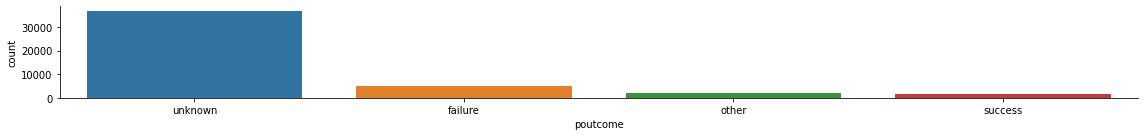

Information about y
no     88.3
yes    11.7
Name: y, dtype: float64


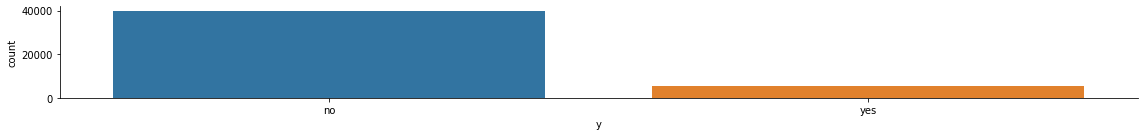

In [66]:
cat(df=train, c=['age_cat','job','marital','education','default','balance_cat','housing','loan','contact','day_cat','month','duration_cat','campaign_cat','pdays_cat','previous_cat','poutcome','y'])

In [67]:
# Normalizing the train and test data with TRAINING mean and var.

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

for column in train.columns:
    if train[column].dtype in ['int64', 'float64']:
        
        X = train[column].array.reshape(-1,1)
        
        # build the scaler model
        scaler = MinMaxScaler()
        
        # fit using the train set
        scaler.fit(X)

        train[column]=scaler.transform(train[column].array.reshape(-1, 1)) # Apply to train
        test[column]=scaler.transform(test[column].array.reshape(-1, 1)) # Apply to test
        

In [68]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.297873,0.085171,0.493547,0.052494,0.028449,0.047245,0.002110
std,0.137906,0.027643,0.277416,0.052364,0.049968,0.114827,0.008376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.233333,0.020943,0.000000,0.000000,0.000000
50%,0.272727,0.076871,0.500000,0.036600,0.016129,0.000000,0.000000
75%,0.389610,0.085768,0.666667,0.064864,0.032258,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.300910,0.085719,0.497176,0.053672,0.028930,0.046751,0.001973
std,0.137353,0.027324,0.274922,0.052838,0.050158,0.114818,0.006158
min,0.012987,0.042725,0.000000,0.000813,0.000000,0.000000,0.000000
25%,0.194805,0.073430,0.266667,0.021147,0.000000,0.000000,0.000000
50%,0.272727,0.076834,0.500000,0.037617,0.016129,0.000000,0.000000
75%,0.402597,0.086240,0.666667,0.066897,0.032258,0.000000,0.000000
max,0.896104,0.719109,1.000000,0.615087,0.790323,1.000000,0.090909


Flagging Outliers

In [70]:
# Creating outlier column where has value 1 if the value is an outlier and 0 if the value is not an outlier.

for column in ['age','balance','duration','campaign','previous']:
    if train[column].dtype in ['int64', 'float64']:

        Q1 = train[column].quantile(0.25)
        Q3 = train[column].quantile(0.75)
        IQR = Q3 - Q1

        low= (Q1 - 1.5 * IQR)
        high = (Q3 + 1.5 * IQR)

        conditions = [ ((train[column] < low) | (train[column] > high) ) , ( (train[column] >= low) |  (train[column] <= high) ) ]         

        values = [1,0]

        train['out_'+str(column)] = np.select(conditions, values) 

        print(train['out_'+str(column)].value_counts(normalize=False))
        
        
        
for column in ['age','balance','duration','campaign','previous']:
    if test[column].dtype in ['int64', 'float64']:

        Q1 = test[column].quantile(0.25)
        Q3 = test[column].quantile(0.75)
        IQR = Q3 - Q1

        low= (Q1 - 1.5 * IQR)
        high = (Q3 + 1.5 * IQR)

        conditions = [ ((test[column] < low) | (test[column] > high) ) , ( (test[column] >= low) |  (test[column] <= high) ) ]         

        values = [1,0]

        test['out_'+str(column)] = np.select(conditions, values) 

        print(test['out_'+str(column)].value_counts(normalize=False))

0    44724
1      487
Name: out_age, dtype: int64
0    40480
1     4731
Name: out_balance, dtype: int64
0    41976
1     3235
Name: out_duration, dtype: int64
0    42147
1     3064
Name: out_campaign, dtype: int64
0    36954
1     8257
Name: out_previous, dtype: int64
0    4477
1      44
Name: out_age, dtype: int64
0    4015
1     506
Name: out_balance, dtype: int64
0    4191
1     330
Name: out_duration, dtype: int64
0    4203
1     318
Name: out_campaign, dtype: int64
0    3705
1     816
Name: out_previous, dtype: int64


# Treat Missing Data

In [71]:
# Creating a column that indentifies if the element was missing for each column with missing values

col_missing = ['poutcome', 'contact', 'education', 'job']

for col in col_missing:
    conditions = [train[col]=='unknown',train[col]!='unknown']           
    
    values = [1,0]    
    
    train[col+'_was_missing'] = np.select(conditions, values)   
    
for col in col_missing:
    conditions = [test[col]=='unknown',test[col]!='unknown']           
    
    values = [1,0]    
    
    test[col+'_was_missing'] = np.select(conditions, values) 

In [72]:
# We have 'unknown' data in ['poutcome', 'contact', 'education', 'job']

j= len(train[train['job']=='unknown']) / train.shape[0]
e= len(train[train['education']=='unknown']) / train.shape[0]
p= len(train[train['poutcome']=='unknown']) / train.shape[0]
c= len(train[train['contact']=='unknown']) / train.shape[0]


print('The % of unknown in job is', "{0:.2%}".format(j))
print('The % of unknown in education is', "{0:.2%}".format(e))
print('The % of unknown in poutcome is', "{0:.2%}".format(p))
print('The % of unknown in contact is', "{0:.2%}".format(c))

The % of unknown in job is 0.64%
The % of unknown in education is 4.11%
The % of unknown in poutcome is 81.75%
The % of unknown in contact is 28.80%


Fix Job Unknown Data

In [73]:
train[train['job']=='unknown']['education'].value_counts()

# The job will be matched with the education mode and the unknowns will be dropped.

unknown      127
secondary     71
primary       51
tertiary      39
Name: education, dtype: int64

In [74]:
indexNeg = train[(train['job']=='unknown') & (train['education']=='unknown')].index # Creating the set of rows to be dropped

train.drop(indexNeg, inplace=True) # Droping the rows

In [75]:
indexNeg = test[(test['job']=='unknown') & (test['education']=='unknown')].index # Creating the set of rows to be dropped

test.drop(indexNeg, inplace=True) # Droping the rows

In [76]:
# Finding the mode's

print('Primary education JOB mode is:')
print(train[train['education']=='primary']['job'].value_counts(normalize=True).nlargest(3))

print('Secondary education JOB mode is')
print(train[train['education']=='secondary']['job'].value_counts(normalize=True).nlargest(3))

print('Tertiary education JOB mode is')
print(train[train['education']=='tertiary']['job'].value_counts(normalize=True).nlargest(3))

Primary education JOB mode is:
blue-collar    0.548533
retired        0.116041
housemaid      0.091519
Name: job, dtype: float64
Secondary education JOB mode is
blue-collar    0.231489
technician     0.225369
admin.         0.181838
Name: job, dtype: float64
Tertiary education JOB mode is
management       0.586497
technician       0.147959
self-employed    0.062627
Name: job, dtype: float64


In [77]:
# We see that tertiary and primary educations have a majority JOB but secundary dont, we'll pick the secondary randomly the three largest presences.



# TRAIN DATA

train['job'] = np.where(((train.job == 'unknown')& (train.education =='primary')),'blue-collar',train.job)


train['job'] = np.where(((train.job == 'unknown')& (train.education =='tertiary')),'management',train.job)

import random

secjobs=['blue-collar','technician','admin.']
i=0
while i <74:
    p=random.choice(secjobs)
    train['job'] = np.where(((train.job == 'unknown')&(train.education =='secondary')),p,train.job)
    i=i+1
    
    
    

    
# TEST DATA

test['job'] = np.where(((test.job == 'unknown')& (test.education =='primary')),'blue-collar',test.job)


test['job'] = np.where(((test.job == 'unknown')& (test.education =='tertiary')),'management',test.job)

import random

secjobs=['blue-collar','technician','admin.']
i=0
while i <74:
    p=random.choice(secjobs)
    test['job'] = np.where( ((test.job == 'unknown')&(test.education =='secondary')),p,test.job)
    i=i+1

Fix Education unknown data

In [78]:
train[train['education']=='unknown']['job'].value_counts()

blue-collar      454
technician       242
management       242
admin.           171
student          163
services         150
retired          119
entrepreneur      76
housemaid         45
self-employed     39
unemployed        29
Name: job, dtype: int64

In [79]:
# Finding the mode's

print('JOB Blue-Collar education mode is:')
print(train[train['job']=='blue-collar']['education'].value_counts(normalize=True).nlargest(2))

print('JOB technician education mode is:')
print(train[train['job']=='technician']['education'].value_counts(normalize=True).nlargest(2))

print('JOB management education mode is:')
print(train[train['job']=='management']['education'].value_counts(normalize=True).nlargest(2))

print('JOB admin education mode is:')
print(train[train['job']=='admin.']['education'].value_counts(normalize=True).nlargest(2))

print('JOB student education mode is:')
print(train[train['job']=='student']['education'].value_counts(normalize=True).nlargest(2))

print('JOB services education mode is:')
print(train[train['job']=='services']['education'].value_counts(normalize=True).nlargest(2))

print('JOB retired education mode is:')
print(train[train['job']=='retired']['education'].value_counts(normalize=True).nlargest(2))

print('JOB entrepreneur education mode is:')
print(train[train['job']=='entrepreneur']['education'].value_counts(normalize=True).nlargest(2))

print('JOB housemaid education mode is:')
print(train[train['job']=='housemaid']['education'].value_counts(normalize=True).nlargest(2))

print('JOB self-employed education mode is:')
print(train[train['job']=='self-employed']['education'].value_counts(normalize=True).nlargest(2))

print('JOB unemployed education mode is:')
print(train[train['job']=='unemployed']['education'].value_counts(normalize=True).nlargest(2))

JOB Blue-Collar education mode is:
secondary    0.549014
primary      0.389349
Name: education, dtype: float64
JOB technician education mode is:
secondary    0.691184
tertiary     0.256651
Name: education, dtype: float64
JOB management education mode is:
tertiary     0.825524
secondary    0.118037
Name: education, dtype: float64
JOB admin education mode is:
secondary    0.815896
tertiary     0.110617
Name: education, dtype: float64
JOB student education mode is:
secondary    0.541578
tertiary     0.237740
Name: education, dtype: float64
JOB services education mode is:
secondary    0.832210
primary      0.083052
Name: education, dtype: float64
JOB retired education mode is:
secondary    0.434629
primary      0.351148
Name: education, dtype: float64
JOB entrepreneur education mode is:
tertiary     0.461332
secondary    0.364492
Name: education, dtype: float64
JOB housemaid education mode is:
primary      0.505645
secondary    0.318548
Name: education, dtype: float64
JOB self-employed edu

In [80]:
# Using the Modes

s=['blue-collar', 'technician', 'admin.' ,'student', 'education', 'retired', 'services' ,'unemployed']
t=['management','entrepreneur','self-employed']

# TRAIN DATA

for job in s:
    train['education'] = np.where( ((train.education == 'unknown')& (train.job ==job)),'secondary',train.education)
    
for job in t:
    train['education'] = np.where( ((train.education == 'unknown')& (train.job ==job)),'tertiary',train.education)
    
train['education'] = np.where( ((train.education == 'unknown')& (train.job =='housemaid')),'primary',train.education)


#TEST DATA

for job in s:
    test['education'] = np.where( ((test.education == 'unknown')& (test.job ==job)),'secondary',test.education)
    
for job in t:
    test['education'] = np.where( ((test.education == 'unknown')& (test.job ==job)),'tertiary',test.education)
    
test['education'] = np.where( ((test.education == 'unknown')& (test.job =='housemaid')),'primary',test.education)

Fix Contact unknown data

In [81]:
train['contact'].value_counts()

cellular     29236
unknown      12966
telephone     2882
Name: contact, dtype: int64

In [82]:
#TRAIN

train['contact'] = np.where( (train.contact == 'unknown'),'cellular',train.contact)

#TEST

test['contact'] = np.where( (test.contact == 'unknown'),'cellular',test.contact)

In [83]:
train['contact'].value_counts()

cellular     42202
telephone     2882
Name: contact, dtype: int64

Fix Poutcome unknown data

In [84]:
round(train['poutcome'].value_counts(normalize=True)*100,2)

unknown    81.72
failure    10.86
other       4.08
success     3.34
Name: poutcome, dtype: float64

In [85]:
# Since most of the poutcome is 'unknown' any attempt to replace them will bring a lot of BIAS so we'll discard the column

train.drop(columns=['poutcome','poutcome_was_missing'],inplace=True)
test.drop(columns=['poutcome','poutcome_was_missing'],inplace=True)

In [86]:
# Day of the Month is not relevant for a model

train.drop(columns=['day'],inplace=True)
test.drop(columns=['day'],inplace=True)

# Dropping the categorical columns we created. Except for 'pdayscat' and 'daycat', since both these features have numerical values that may influence badly the ML model.

train['TARGET']=train['y']
test['TARGET']=test['y']

a= train['TARGET']
b= test['TARGET']

train.drop(columns=['TARGET','day_cat','y','age_cat','balance_cat','duration_cat','campaign_cat','pdays','previous_cat'],inplace=True)
test.drop(columns=['TARGET','day_cat','y','pdays'],inplace=True)

Encoding Categorical Variables

In [87]:
train = train.reset_index(drop=True)

from sklearn import preprocessing
    
def label_encoder(train,column):
    le=preprocessing.LabelEncoder()
    le.fit_transform(train[column])
    ohe = preprocessing.OneHotEncoder()
    temp_array= ohe.fit_transform(train[[column]]).toarray()
    column_names = [column+"_"+str(m) for m in le.classes_]
    return(pd.DataFrame(temp_array,columns=column_names))
     
numerical_variables = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

print(numerical_variables)

categorical_variables = [col for col in train.columns if train[col].dtype == 'object']

new_df = train[numerical_variables]

for column in categorical_variables:
    new_df = pd.concat([new_df,label_encoder(train,column)],axis=1)
        
# Label Encoder Target

le = preprocessing.LabelEncoder()
le.fit(a)

new_df['TARGET'] = le.transform(a)

new_df.columns



### Link to Reference code from Andrada Olteanu: https://www.kaggle.com/andradaolteanu/housing-prices-competition-iowa-dataset

['age', 'balance', 'duration', 'campaign', 'previous', 'out_age', 'out_balance', 'out_duration', 'out_campaign', 'out_previous', 'contact_was_missing', 'education_was_missing', 'job_was_missing']


Index(['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdays_cat_0/50', 'pdays_cat_100/150', 'pdays_cat_150/200',
       'pdays_cat_200/250', 'pdays_cat_250/300', 'pdays_cat_30

In [88]:
test = test.reset_index(drop=True)

from sklearn import preprocessing
    
def label_encoder(test,column):
    le=preprocessing.LabelEncoder()
    le.fit_transform(test[column])
    ohe = preprocessing.OneHotEncoder()
    temp_array= ohe.fit_transform(test[[column]]).toarray()
    column_names = [column+"_"+str(m) for m in le.classes_]
    return(pd.DataFrame(temp_array,columns=column_names))
     

numerical_variables = [col for col in test.columns if test[col].dtype in ['int64', 'float64']]

categorical_variables = [col for col in test.columns if test[col].dtype == 'object']

new_test = test[numerical_variables]

for column in categorical_variables:
    new_test = pd.concat([new_test,label_encoder(test,column)],axis=1)
    
    
# Label Encoder Target

le = preprocessing.LabelEncoder()
le.fit(b)

new_test['TARGET'] = le.transform(b)

new_test.columns

## new_test is the TEST dataframe encoded.

### Link to Reference code from Andrada Olteanu: https://www.kaggle.com/andradaolteanu/housing-prices-competition-iowa-dataset

Index(['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdays_cat_0/50', 'pdays_cat_100/150', 'pdays_cat_150/200',
       'pdays_cat_200/250', 'pdays_cat_250/300', 'pdays_cat_30

In [89]:
## train is the training dataframe encoded, test is the test dataframe encoded.

train= new_df.copy()

test= new_test.copy()

print(train.shape)

print(test.shape)

(45084, 64)
(4506, 64)


In [90]:
train.describe()

,age,balance,duration,campaign,previous,out_age,out_balance,out_duration,out_campaign,out_previous,...,pdays_cat_250/300,pdays_cat_300/350,pdays_cat_350/400,pdays_cat_400/450,pdays_cat_450/500,pdays_cat_50/100,pdays_cat_500/550,pdays_cat_>550,pdays_cat_nc,TARGET
count,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,...,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000,45084.000000
mean,0.297550,0.085158,0.052496,0.028424,0.002114,0.010691,0.104583,0.071555,0.067674,0.182903,...,0.021648,0.025796,0.024399,0.001353,0.001442,0.025574,0.000732,0.001619,0.817097,0.116915
std,0.137791,0.027627,0.052376,0.049906,0.008386,0.102845,0.306018,0.257753,0.251188,0.386591,...,0.145535,0.158529,0.154286,0.036759,0.037943,0.157864,0.027045,0.040207,0.386591,0.321323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.073457,0.020943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.272727,0.076871,0.036600,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.389610,0.085732,0.064864,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


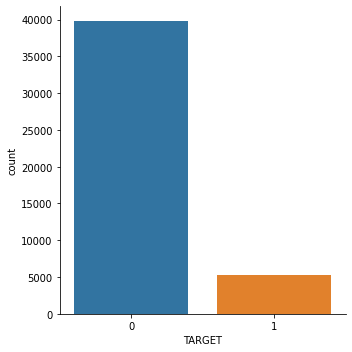

In [91]:
sns.catplot(data=train, x='TARGET', kind ='count')

In [92]:
# Find correlations with the target and sort
correlations = train.corr()['TARGET'].sort_values()

# Display correlations
correlations

pdays_cat_nc          -0.166943
contact_was_missing   -0.150511
housing_yes           -0.139272
month_may             -0.102540
campaign              -0.073086
                         ...   
out_previous           0.166943
pdays_cat_50/100       0.186806
out_duration           0.340086
duration               0.394545
TARGET                 1.000000
Name: TARGET, Length: 64, dtype: float64

#Cross Validation

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [94]:
models = [LogisticRegression(solver='liblinear') ,SVC(gamma='auto'),RandomForestClassifier()] # Models insert here

In [95]:
Y_train = train['TARGET']
X_train = train.drop(columns=['TARGET'], axis=1)
X_test = test.drop(columns=['TARGET'])
Y_test = test['TARGET']

In [96]:
#Using stratified Kfold due to class imbalance

from sklearn import model_selection
def model_train(model, x, y):
    kfold = model_selection.StratifiedKFold(n_splits=10)
    pred = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    cv_mean = pred.mean()
    
    print('Model:',model)
    
    print('CV mean: %0.3f' % (cv_mean))    

In [97]:
for model in models:
    model_train(model, X_train, Y_train)

Model: LogisticRegression(solver='liblinear')
CV mean: 0.806
Model: SVC(gamma='auto')
CV mean: 0.791
Model: RandomForestClassifier()
CV mean: 0.770


#Balancing Class with SMOTE

In [98]:
# Finding the RATIO of Imbalance of classes in our training data set

dfo= pd.read_csv('train.csv',delimiter=';') #Train dataset

a= len(dfo[dfo['y']=='yes'])/len(dfo[dfo['y']=='no'])

print("The ratio Yes/No is",round(a,3),"Yes to one No or for each Yes there is",round(1/a,3),"No's")

The ratio Yes/No is 0.132 Yes to one No or for each Yes there is 7.548 No's


In [99]:
train

,age,balance,duration,campaign,previous,out_age,out_balance,out_duration,out_campaign,out_previous,...,pdays_cat_250/300,pdays_cat_300/350,pdays_cat_350/400,pdays_cat_400/450,pdays_cat_450/500,pdays_cat_50/100,pdays_cat_500/550,pdays_cat_>550,pdays_cat_nc,TARGET
0,0.519481,0.092259,0.053070,0.000000,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.337662,0.073067,0.030704,0.000000,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.194805,0.072822,0.015453,0.000000,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.376623,0.086476,0.018707,0.000000,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.220779,0.074901,0.028264,0.000000,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45079,0.428571,0.080293,0.198658,0.032258,0.000000,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
45080,0.688312,0.088501,0.092721,0.016129,0.000000,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
45081,0.701299,0.124689,0.229158,0.064516,0.010909,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
45082,0.506494,0.078868,0.103294,0.048387,0.000000,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [100]:
# Data Augmentantion

from imblearn.over_sampling import SMOTE
X_train_resampled, Y_train_resampled = SMOTE().fit_resample(train[['age', 'balance', 'duration', 'campaign', 'previous', 'out_age',
       'out_balance', 'out_duration', 'out_campaign', 'out_previous',
       'contact_was_missing', 'education_was_missing', 'job_was_missing',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdays_cat_0/50', 'pdays_cat_100/150', 'pdays_cat_150/200',
       'pdays_cat_200/250', 'pdays_cat_250/300', 'pdays_cat_300/350',
       'pdays_cat_350/400', 'pdays_cat_400/450', 'pdays_cat_450/500',
       'pdays_cat_50/100', 'pdays_cat_500/550', 'pdays_cat_>550', 'pdays_cat_nc']], train['TARGET'])

Y_train_resampled.value_counts()

0    39813
1    39813
Name: TARGET, dtype: int64

In [101]:
print(X_train_resampled.shape)
print(Y_train_resampled.shape)

(79626, 63)
(79626,)


In [102]:
print(X_test.shape)
print(Y_test.shape)

(4506, 63)
(4506,)


Cross Validation after SMOTE

In [103]:
for model in models:
    model_train(model, X_train_resampled,Y_train_resampled)

Model: LogisticRegression(solver='liblinear')
CV mean: 0.780
Model: SVC(gamma='auto')
CV mean: 0.723
Model: RandomForestClassifier()
CV mean: 0.872


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, f1_score, roc_auc_score

def eval(model,X_train,y_train,X_test,Y_test):
    
    #print(model)
    
    # Training
    model.fit(X_train,y_train)

    # Predicting based in X_test
    y_pred = model.predict(X_test)

    # Model Evaluating
        
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()   

    Accuracy = round(accuracy_score(Y_test, y_pred),3)

    Precision = round(precision_score(Y_test, y_pred),3)

    Recall= round(recall_score(Y_test, y_pred),3)

    F1=  round(f1_score(Y_test, y_pred),3)    
    
    ROC_AUC=  round(roc_auc_score(Y_test, y_pred),3)
    
    dict={'TN':tn, 'FP':fp, 'FN':fn, 'TP':tp, 'Ac':Accuracy, 'Pc':Precision, 'Rcll':Recall, 'F1':F1, 'roc_auc':ROC_AUC}
           
    return(dict)

In [105]:
for m in models:
  print(m)
  print("Before SMOTE:",eval(m,X_train,Y_train,X_test,Y_test))
  print("After SMOTE:",eval(m, X_train_resampled, Y_train_resampled,X_test,Y_test))

LogisticRegression(solver='liblinear')
Before SMOTE: {'TN': 3880, 'FP': 108, 'FN': 367, 'TP': 151, 'Ac': 0.895, 'Pc': 0.583, 'Rcll': 0.292, 'F1': 0.389, 'roc_auc': 0.632}
After SMOTE: {'TN': 3359, 'FP': 629, 'FN': 101, 'TP': 417, 'Ac': 0.838, 'Pc': 0.399, 'Rcll': 0.805, 'F1': 0.533, 'roc_auc': 0.824}
SVC(gamma='auto')
Before SMOTE: {'TN': 3888, 'FP': 100, 'FN': 382, 'TP': 136, 'Ac': 0.893, 'Pc': 0.576, 'Rcll': 0.263, 'F1': 0.361, 'roc_auc': 0.619}
After SMOTE: {'TN': 3453, 'FP': 535, 'FN': 117, 'TP': 401, 'Ac': 0.855, 'Pc': 0.428, 'Rcll': 0.774, 'F1': 0.552, 'roc_auc': 0.82}
RandomForestClassifier()
Before SMOTE: {'TN': 3988, 'FP': 0, 'FN': 16, 'TP': 502, 'Ac': 0.996, 'Pc': 1.0, 'Rcll': 0.969, 'F1': 0.984, 'roc_auc': 0.985}
After SMOTE: {'TN': 3982, 'FP': 6, 'FN': 3, 'TP': 515, 'Ac': 0.998, 'Pc': 0.988, 'Rcll': 0.994, 'F1': 0.991, 'roc_auc': 0.996}


In [106]:
# import matplotlib.pyplot as plt

# for m in models:

#     When = ['Before SMOTE','After SMOTE']

#     TN= [eval(m,X_train,Y_train,X_test,Y_test)['TN'], eval(m, X_train_resampled, Y_train_resampled,X_test,Y_test)['TN']]
#     FP= [eval(m,X_train,Y_train,X_test,Y_test)['FP'], eval(m, X_train_resampled, Y_train_resampled,X_test,Y_test)['FP']]
#     FN= [eval(m,X_train,Y_train,X_test,Y_test)['FN'], eval(m, X_train_resampled, Y_train_resampled,X_test,Y_test)['FN']]
#     TP= [eval(m,X_train,Y_train,X_test,Y_test)['TP'], eval(m, X_train_resampled, Y_train_resampled,X_test,Y_test)['TP']]
  
#     plt.figure(figsize=(10, 10))
#     plt.plot(When, TN, color='red', marker='o')
#     plt.plot(When, FP, color='blue', marker='x')
#     plt.plot(When, FN, color='green', marker='8')
#     plt.plot(When, TP, color='black', marker='s')

#     plt.title(m, fontsize=15)
#     plt.xlabel('When', fontsize=15)
#     plt.ylabel('Values', fontsize=15)
#     plt.legend(['TN', 'FP','FN','TP'], fontsize=15)
#     plt.show()


#     When = ['Before SMOTE','After SMOTE']

#     AC= [eval(m,X_train,Y_train,X_test,Y_test)['Ac'], eval(m, X_train_resampled, Y_train_resampled,X_test,Y_test)['Ac']]
#     PC= [eval(m,X_train,Y_train,X_test,Y_test)['Pc'], eval(m, X_train_resampled, Y_train_resampled,X_test,Y_test)['Pc']]
#     RCLL= [eval(m,X_train,Y_train,X_test,Y_test)['Rcll'], eval(m, X_train_resampled, Y_train_resampled,X_test,Y_test)['Rcll']]
#     F1= [eval(m,X_train,Y_train,X_test,Y_test)['F1'], eval(m, X_train_resampled, Y_train_resampled,X_test,Y_test)['F1']]
#     ROC_AUC= [eval(m,X_train,Y_train,X_test,Y_test)['roc_auc'], eval(m, X_train_resampled, Y_train_resampled,X_test,Y_test)['roc_auc']]
  
#     plt.figure(figsize=(10, 10))
#     plt.plot(When, AC, color='red', marker='o')
#     plt.plot(When, PC, color='blue', marker='x')
#     plt.plot(When, RCLL, color='green', marker='8')
#     plt.plot(When, F1, color='black', marker='s')
#     plt.plot(When, ROC_AUC, color='orange', marker='p')

#     plt.title(m, fontsize=15)
#     plt.xlabel('When', fontsize=15)
#     plt.ylabel('Metric Score', fontsize=15)
#     plt.legend(['AC', 'PC','RCLL','F1','ROC_AUC'], fontsize=15)
#     plt.show()